# Exploratory Data Analysis

## Imports

In [1]:
from collections import Counter
import pathlib

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Loading

In [2]:
DATASET_DIR = pathlib.Path('../data/raw/ml-100k/')

In [3]:
ratings = pd.read_csv(DATASET_DIR / 'u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [4]:
item_columns = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL']
genres = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv(DATASET_DIR / 'u.item', sep='|', names=item_columns + genres, encoding="windows-1252")

In [5]:
user_columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
users = pd.read_csv(DATASET_DIR / 'u.user', sep='|', names=user_columns, encoding="windows-1252")

## Data Analysis

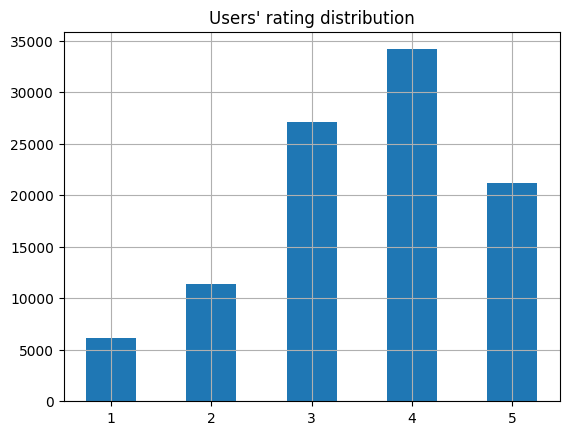

In [6]:
ratings.rating.hist(bins=5, range=(0.5, 5.5), rwidth=0.5)
plt.title("Users' rating distribution")
plt.xticks([1, 2, 3, 4, 5])
plt.savefig('../reports/figures/ratings.png')
plt.show()

As the histogram shows, the ratings are shifted towards the more positive side. While the maximum rating of 5 is rare, ratings of 1 and 2 are even rarer, and ratings of 3 and 4 take the role of neutral ratings. This may be important if the ratings are weighted for recommendations, as users that have rated a film 1, 2, or 5 are more similar than users that rated a film 3 or 4.

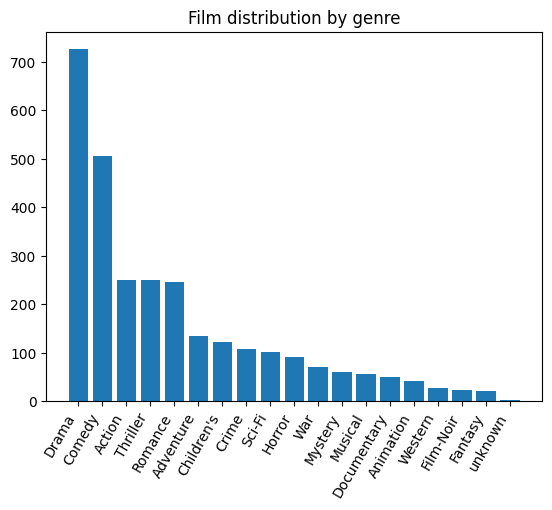

In [7]:
genre_counts = {genre: items[genre].sum() for genre in genres}
genres.sort(key=lambda genre: genre_counts[genre], reverse=True)
plt.title("Film distribution by genre")
plt.bar(x=genres, height=[genre_counts[genre] for genre in genres])
plt.xticks(rotation=60, ha="right")
plt.savefig('../reports/figures/genres.png', bbox_inches='tight')
plt.show()

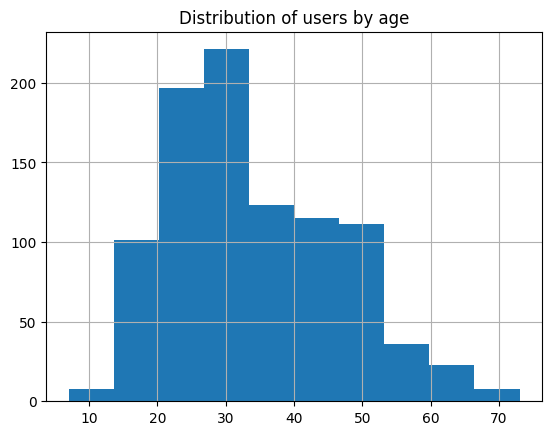

In [8]:
users.age.hist()
plt.title("Distribution of users by age")
plt.savefig('../reports/figures/ages.png')
plt.show()

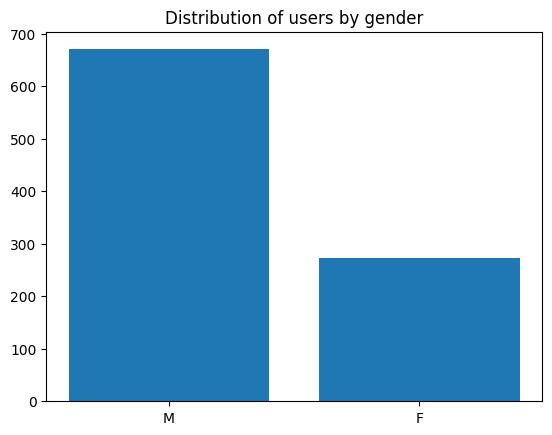

In [9]:
gender_counts = Counter(users.gender)
genders, counts = zip(*gender_counts.items())
plt.title("Distribution of users by gender")
plt.bar(genders, counts)
plt.savefig('../reports/figures/genders.png')
plt.show()

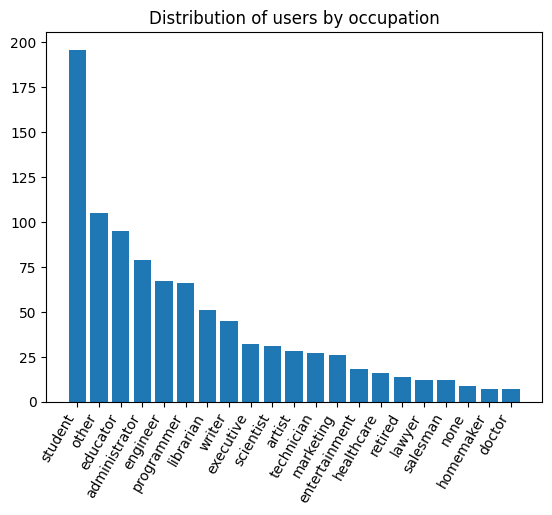

In [10]:
occupation_counts = Counter(users.occupation)
occupations, counts = zip(*sorted(occupation_counts.items(), key=lambda x: x[1], reverse=True))
plt.title("Distribution of users by occupation")
plt.bar(occupations, counts)
plt.xticks(rotation=60, ha="right")
plt.savefig('../reports/figures/occupations.png', bbox_inches='tight')
plt.show()